In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 


In [4]:
user_data = pd.read_csv('dataset/user_feature_total_remove_highcorr.csv').drop_duplicates()

In [6]:
# user_data.head()
len(user_data.columns)

75

# PAC

In [38]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [39]:
user_data.head()
user_data = user_data.fillna(0)

In [40]:
user_data_d = user_data.copy()
user_data = user_data.drop('time',axis=1)
user_categorical = user_data.select_dtypes(exclude='float64').drop('User_id',axis=1)

## onehot transformation

In [41]:
user_onehot = pd.get_dummies(user_categorical)
user_onehot.head()

,MODE(offline.Discount_rate)_0,MODE(offline.Discount_rate)_0.2,MODE(offline.Discount_rate)_0.5,MODE(offline.Discount_rate)_0.6,MODE(offline.Discount_rate)_0.7,MODE(offline.Discount_rate)_0.75,MODE(offline.Discount_rate)_0.8,MODE(offline.Discount_rate)_0.85,MODE(offline.Discount_rate)_0.9,MODE(offline.Discount_rate)_0.95,...,MODE(online.Discount_rate WHERE Action = 2)_50:10,MODE(online.Discount_rate WHERE Action = 2)_50:20,MODE(online.Discount_rate WHERE Action = 2)_50:30,MODE(online.Discount_rate WHERE Action = 2)_50:5,MODE(online.Discount_rate WHERE Action = 2)_5:1,MODE(online.Discount_rate WHERE Action = 2)_800:10,MODE(online.Discount_rate WHERE Action = 2)_800:100,MODE(online.Discount_rate WHERE Action = 2)_800:20,MODE(online.Discount_rate WHERE Action = 2)_800:30,MODE(online.Discount_rate WHERE Action = 2)_800:50
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
user_data_merge = pd.merge(user_data.select_dtypes(exclude='object'),user_onehot,left_index=True,right_index=True)

## standardization

In [46]:
std_scaler = StandardScaler()
user_std = pd.DataFrame(std_scaler.fit_transform(user_data_merge),columns=user_data_merge.columns)

In [47]:
user_std.head()

,User_id,"AVG_TIME_BETWEEN(offline.Date, unit=days)","AVG_TIME_BETWEEN(offline.Date_received, unit=days)",COUNT(offline),MAX(offline.Distance),MAX(offline.promotion_amonut),MAX(offline.promotion_condition),MAX(offline.uniform_discount_rate),MEAN(offline.Distance),MEAN(offline.give_coupon),...,MODE(online.Discount_rate WHERE Action = 2)_50:10,MODE(online.Discount_rate WHERE Action = 2)_50:20,MODE(online.Discount_rate WHERE Action = 2)_50:30,MODE(online.Discount_rate WHERE Action = 2)_50:5,MODE(online.Discount_rate WHERE Action = 2)_5:1,MODE(online.Discount_rate WHERE Action = 2)_800:10,MODE(online.Discount_rate WHERE Action = 2)_800:100,MODE(online.Discount_rate WHERE Action = 2)_800:20,MODE(online.Discount_rate WHERE Action = 2)_800:30,MODE(online.Discount_rate WHERE Action = 2)_800:50
0,-0.870591,-0.35893,-0.325514,-0.516416,-0.494252,-0.552205,-0.550100,-0.843090,-0.450414,-0.739624,...,-0.071283,-0.018366,-0.023182,-0.097492,-0.075351,-0.004106,-0.016932,-0.010753,-0.001552,-0.018948
1,-1.655933,-0.35893,-0.325514,-0.516416,-0.494252,-0.552205,-0.550100,-0.843090,-0.450414,-0.739624,...,-0.071283,-0.018366,-0.023182,-0.097492,-0.075351,-0.004106,-0.016932,-0.010753,-0.001552,-0.018948
2,-1.688636,-0.35893,-0.325514,-0.516416,-0.494252,-0.552205,-0.550100,-0.843090,-0.450414,-0.739624,...,-0.071283,-0.018366,-0.023182,-0.097492,-0.075351,-0.004106,-0.016932,-0.010753,-0.001552,-0.018948
3,0.177965,-0.35893,-0.325514,-0.004648,2.938813,0.580303,0.997367,1.254742,3.918497,1.774270,...,-0.071283,-0.018366,-0.023182,-0.097492,-0.075351,-0.004106,-0.016932,-0.010753,-0.001552,-0.018948
4,-1.682831,-0.35893,-0.325514,-0.260532,-0.494252,0.580303,0.997367,1.254742,-0.450414,1.774270,...,-0.071283,-0.018366,-0.023182,-0.097492,-0.075351,-0.004106,-0.016932,-0.010753,-0.001552,-0.018948


## PCA

In [48]:
pca = PCA(n_components=100).fit(user_std)
user_pca = pca.transform(user_std)

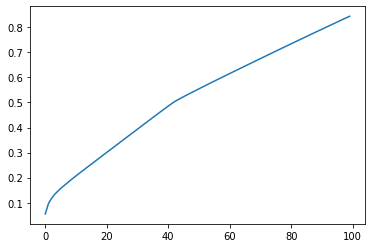

In [49]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)

In [50]:
user_pca_backup = user_pca.copy()
user_pca_df = pd.DataFrame(user_pca,columns=['component_'+str(i) for i in range(user_pca.shape[1])])

# Clustering

In [51]:
from sklearn.cluster import KMeans
import sklearn.metrics as sm

[106679674.78987937, 102793128.91437812, 101353989.93045832, 100035490.67965609, 98512173.10018796, 97182552.29204947, 95967940.549575, 94421853.27554877, 93238019.30890198, 92655771.26248237, 91065812.90833311, 89738626.18496034, 88917563.47486232, 87546116.2582473, 86713891.87144834, 85434130.60342233, 83909632.38728675, 82330428.04146604]


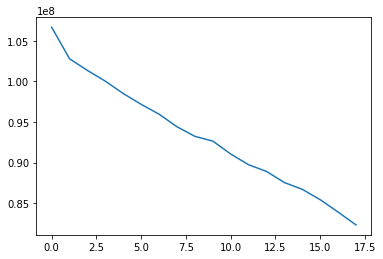

In [52]:
ks=range(2,20)
result = [0]*len(ks)
for index,i in enumerate(ks):
    model = KMeans(n_clusters = i,random_state=1)
    model.fit(user_pca_df)
    result[index]=model.inertia_
print(result)
plt.plot(result)

In [55]:
k = 3
model = KMeans(n_clusters = 3,random_state=1)
user_kmeans_group = model.fit_transform(user_pca_df)

In [56]:
# tool function to return label
def get_kmeans_label(l)->int:
    return l.index(min(l))

In [58]:
user_kmeans_label = pd.DataFrame(map(get_kmeans_label,user_kmeans_group.tolist()),columns=['kmeans_group'])

In [62]:
## join with original dataset
user_data_with_kmeans_label= pd.merge(user_data_d,user_kmeans_label,left_index=True,right_index=True)

(array([3.90716e+05, 7.06300e+03, 6.39600e+03, 3.54200e+03, 9.29000e+02,
        3.49600e+03, 6.74000e+02, 1.54000e+02, 8.10000e+01, 2.13000e+03]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

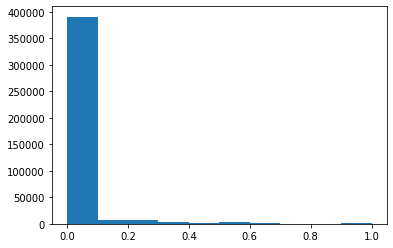

In [63]:
plt.hist(user_data_with_kmeans_label['MEAN(offline.use_coupon)'])

In [64]:
user_data_with_kmeans_label.groupby("kmeans_group").mean()['MEAN(offline.use_coupon)']

kmeans_group
0    0.025906
1    0.050469
2    0.000005
Name: MEAN(offline.use_coupon), dtype: float64

In [65]:
## output
user_id_with_kmeans_label = user_data_with_kmeans_label[['User_id','kmeans_group','time']].drop_duplicates()
user_id_with_kmeans_label.to_csv('dataset/kmeans_label.csv')

In [23]:
c=user_data.groupby("User_id").count()